In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

## Getting Data

In [2]:
df = pd.read_csv('data/term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
df['y'] = pd.get_dummies(df['y']).drop('no', axis = 1)

Attributes:

`age` : age of customer (numeric)  
`job` : type of job (categorical)  
`marital` : marital status (categorical)  
`education` (categorical)  
`default`: has credit in default? (binary)  
`balance`: average yearly balance, in euros (numeric)  
`housing`: has a housing loan? (binary)  
`loan`: has personal loan? (binary)  
`contact`: contact communication type (categorical)  
`day`: last contact day of the month (numeric)  
`month`: last contact month of year (categorical)  
`duration`: last contact duration, in seconds (numeric)  
`campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  
Output (desired target):  

`y` - has the client subscribed to a term deposit? (binary)

Goal(s):  

Predict if the customer will subscribe (yes/no) to a term deposit (variable `y`)  

Success Metric(s):  

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.  
  
Bonus(es):  
  
We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.  
  
What makes the customers buy? Tell us which feature we should be focusing more on.  

## Part I: Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  uint8 
dtypes: int64(5), object(8), uint8(1)
memory usage: 4.0+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,0.072400
std,9.641776,2903.769716,8.278127,259.366498,3.239051,0.259152
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,1.000000


In [6]:
df['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

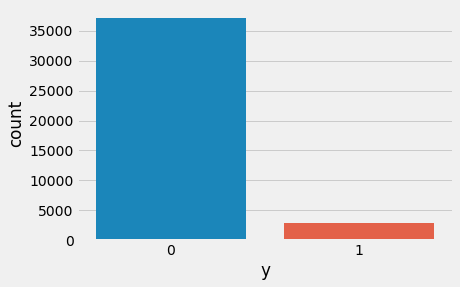

In [7]:
sns.countplot(data = df, x = 'y')

<AxesSubplot:xlabel='y', ylabel='age'>

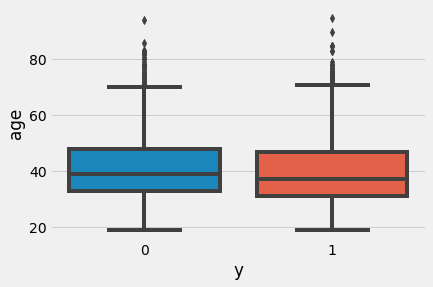

In [8]:
sns.boxplot(data = df, x = 'y', y = 'age')

<AxesSubplot:xlabel='y', ylabel='duration'>

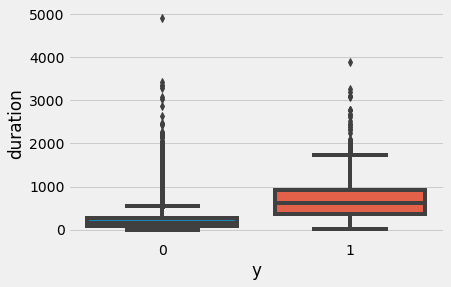

In [9]:
sns.boxplot(data = df, x = 'y', y = 'duration')

<AxesSubplot:xlabel='age', ylabel='duration'>

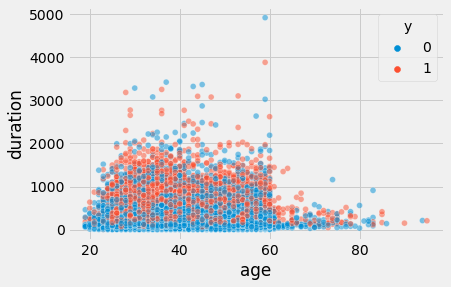

In [10]:
sns.scatterplot(data = df, x = 'age', y = 'duration', hue = 'y', alpha = 0.5)

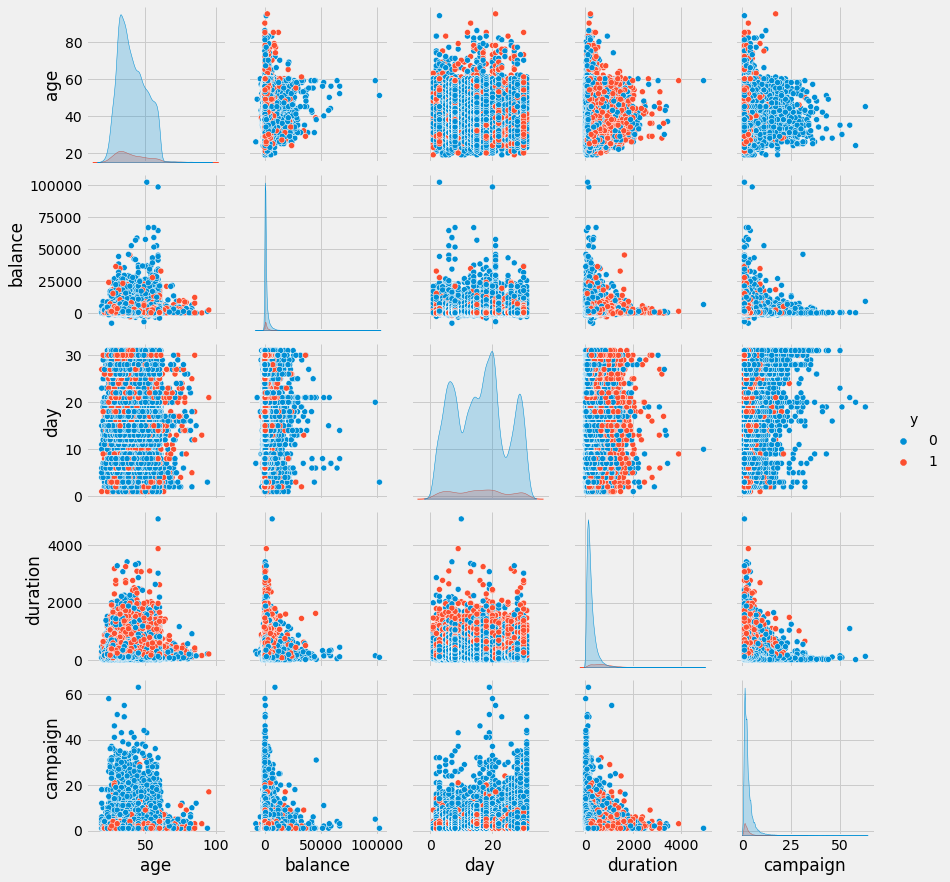

In [11]:
sns.pairplot(data = df, hue = 'y')

<AxesSubplot:xlabel='campaign', ylabel='y'>

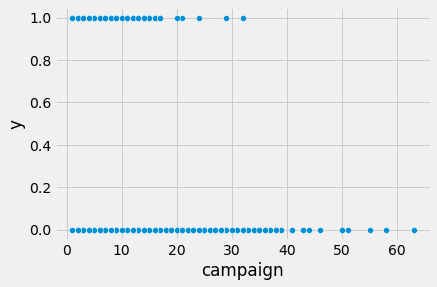

In [12]:
sns.scatterplot(data = df, x = 'campaign', y = 'y')

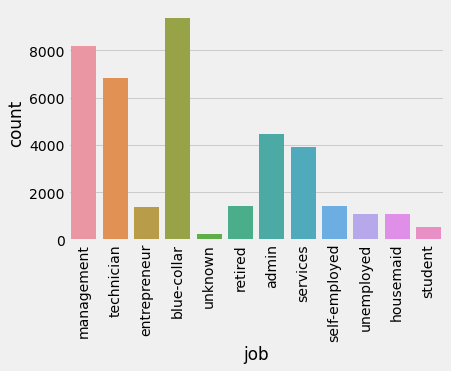

In [13]:
g = sns.countplot(data = df, x = 'job')
g.set_xticklabels(rotation=90, labels = df['job'].unique());

<AxesSubplot:>

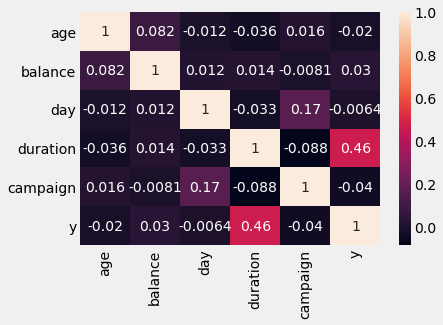

In [15]:
sns.heatmap(df.corr(), annot = True)

In [16]:
pd.pivot_table(df, index = 'y')

,age,balance,campaign,day,duration
y,,,,,
0,40.599208,1249.752533,2.918688,16.032072,221.408042
1,39.844959,1588.495856,2.414365,15.827003,682.958564


<AxesSubplot:>

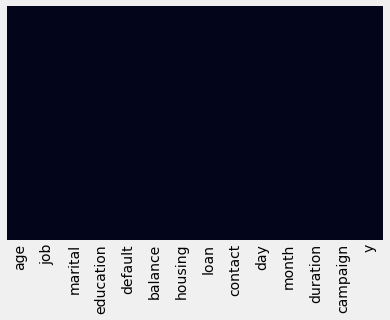

In [17]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

## Part II: Feature Engineering

In order to make the dataset workable with a classification model, changing the `categorical` columns to get dummy variables was necessary. Hence, the process below:

In [18]:
job_df = pd.get_dummies(df['job'], prefix = 'job').drop('job_unknown', axis = 1)
df = df.join(job_df).drop('job', axis = 1)

In [19]:
marital_df = pd.get_dummies(df['marital'])
df = df.join(marital_df).drop('marital', axis = 1)

In [20]:
education_df = pd.get_dummies(df['education'], prefix = 'education').drop('education_unknown', axis = 1)
df = df.join(education_df).drop('education', axis = 1)

In [21]:
contact_df = pd.get_dummies(df['contact'], prefix = 'contact').drop('contact_unknown', axis = 1)
df = df.join(contact_df).drop('contact', axis = 1)

In [22]:
df['default'] = pd.get_dummies(df['default']).drop('no', axis = 1).rename({'yes': 'default'}, axis = 1)

In [23]:
df['loan'] = pd.get_dummies(df['loan']).drop('no', axis = 1).rename({'yes': 'loan'}, axis = 1)

In [24]:
df['housing'] = pd.get_dummies(df['housing']).drop('no', axis = 1).rename({'yes': 'housing'}, axis = 1)

In [25]:
month_values = {
    'jan': 1, 'feb': 2, 'mar': 3, 
    'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9,
    'oct': 10, 'nov': 11, 'dec': 12,
}

df['month'] = df['month'].replace(month_values)

## Part II: Model Training

In [26]:
X = df.drop('y', axis = 1)
y = df['y']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 73)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [32]:
log_model = LogisticRegression(
    solver = 'saga',
    max_iter = 10000000,
    verbose = 0,
)

In [33]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=10000000, solver='saga')

In [37]:
penalty = ['l1', 'l2', 'elasticnet']

l1_ratio = np.linspace(0, 1, 10)
C = [5]

param_grid = {
    'penalty': penalty,
    'l1_ratio': l1_ratio,
    'C': C,
}

In [38]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [39]:
grid_model.fit(scaled_X_train, y_train);

/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/opt/conda/envs/rapids/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio

#### Logistic Regression Optimal Parameters:

In [40]:
grid_model.best_params_

{'C': 5, 'l1_ratio': 0.0, 'penalty': 'l1'}

## Part III: Model Performance Evaluation

In [41]:
grid_predictions = grid_model.predict(scaled_X_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

> Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

In [53]:
accuracy_score(y_test, grid_predictions)

0.9325

In [43]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3702
           1       0.64      0.22      0.32       298

    accuracy                           0.93      4000
   macro avg       0.79      0.60      0.64      4000
weighted avg       0.92      0.93      0.92      4000



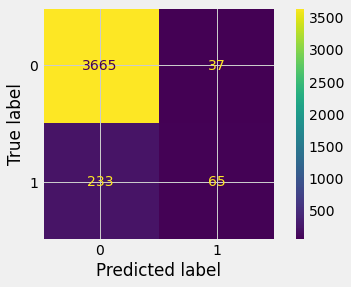

In [44]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [45]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

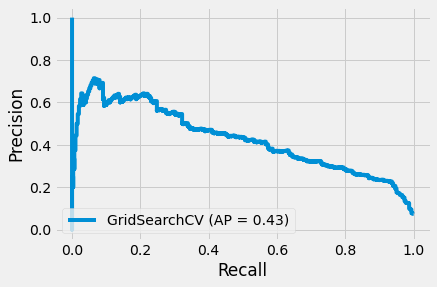

In [46]:
plot_precision_recall_curve(grid_model, scaled_X_test, y_test)

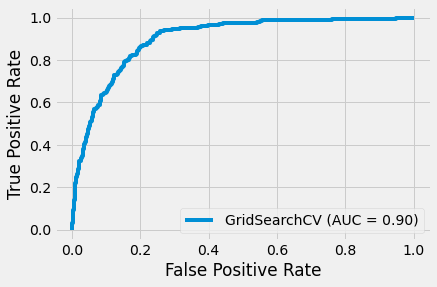

In [47]:
plot_roc_curve(grid_model, scaled_X_test, y_test)

## Part IV: Answering Questions

> We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

> What makes the customers buy? Tell us which feature we should be focusing more on. 

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
coefs = pd.Series(index = X.columns, data = grid_model.best_estimator_.coef_[0])

[Text(0, 0, 'month'),
 Text(1, 0, 'housing'),
 Text(2, 0, 'campaign'),
 Text(3, 0, 'loan'),
 Text(4, 0, 'job_blue-collar'),
 Text(5, 0, 'job_housemaid'),
 Text(6, 0, 'job_management'),
 Text(7, 0, 'job_services'),
 Text(8, 0, 'married'),
 Text(9, 0, 'job_unemployed'),
 Text(10, 0, 'job_technician'),
 Text(11, 0, 'job_entrepreneur'),
 Text(12, 0, 'job_self-employed'),
 Text(13, 0, 'age'),
 Text(14, 0, 'default'),
 Text(15, 0, 'job_admin'),
 Text(16, 0, 'divorced'),
 Text(17, 0, 'education_primary'),
 Text(18, 0, 'day'),
 Text(19, 0, 'single'),
 Text(20, 0, 'job_retired'),
 Text(21, 0, 'job_student'),
 Text(22, 0, 'education_secondary'),
 Text(23, 0, 'balance'),
 Text(24, 0, 'education_tertiary'),
 Text(25, 0, 'contact_telephone'),
 Text(26, 0, 'contact_cellular'),
 Text(27, 0, 'duration')]

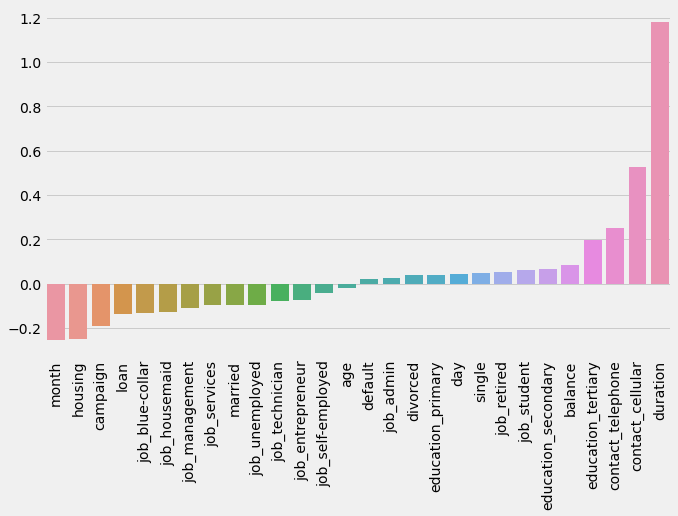

In [50]:
coefs = coefs.sort_values()
plt.figure(figsize = (10, 6))
g = sns.barplot(x = coefs.index, y = coefs.values)
g.set_xticklabels(rotation = 90, labels = coefs.index)

## Conclusion

By far, the most influential part of the campaign for customer to decide whether or not subscribe is the `duration` of their last contact.  

This may have psychological reasons to it, or other reasons that needs to be explored.  

Continuing, the most reasonable population to focus on in order to have higher chance of having more sheer number of subscribers would be customers with tertiary `education` who have positive `balance` and they need to be contacted with their either `telephone` or `cellular` number and the conversation needs to long.